In [ ]:
pip install pycountry_convert

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
import warnings

sns.set_theme(context='notebook', style='whitegrid', palette='deep', color_codes=True)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
life_expectancy_data = pd.read_csv("../input/life-expectancy-who/Life Expectancy Data.csv")
life_expectancy_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
life_expectancy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Countries with the highest Life expectancy
country_vs_life = life_expectancy_data.groupby('Country', as_index=False)["Life expectancy "].mean()
country_vs_life.sort_values(by='Life expectancy ', ascending=False).head()

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875


In [6]:
# Countries with the lowest Life expectancy
country_vs_life.sort_values(by='Life expectancy ', ascending=True).head()

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375


In [7]:
# add Continent column
continents = {'NA': 'North America', 
              'SA': 'South America', 
              'AS': 'Asia', 
              'OC': 'Australia', 
              'AF': 'Africa', 
              'EU': 'Europe'}
continent = []
for country in life_expectancy_data['Country']:
    try:
        continent.append(continents[(country_alpha2_to_continent_code(country_name_to_country_alpha2(country)))])
    except:
        continent.append('Africa')
        
life_expectancy_data["Continent"] = continent

In [8]:
# plot bubble plot
bubble_plot_data = life_expectancy_data[['Country', 'Year', 'Life expectancy ', 'GDP', 'Population', 'Continent']]
bubble_plot_data.dropna(inplace=True)

fig = px.scatter(bubble_plot_data, x='GDP', y='Life expectancy ', size='Population', 
                 color='Continent', hover_name='Country', log_x=True, size_max=50)
fig.show()

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<AxesSubplot:>

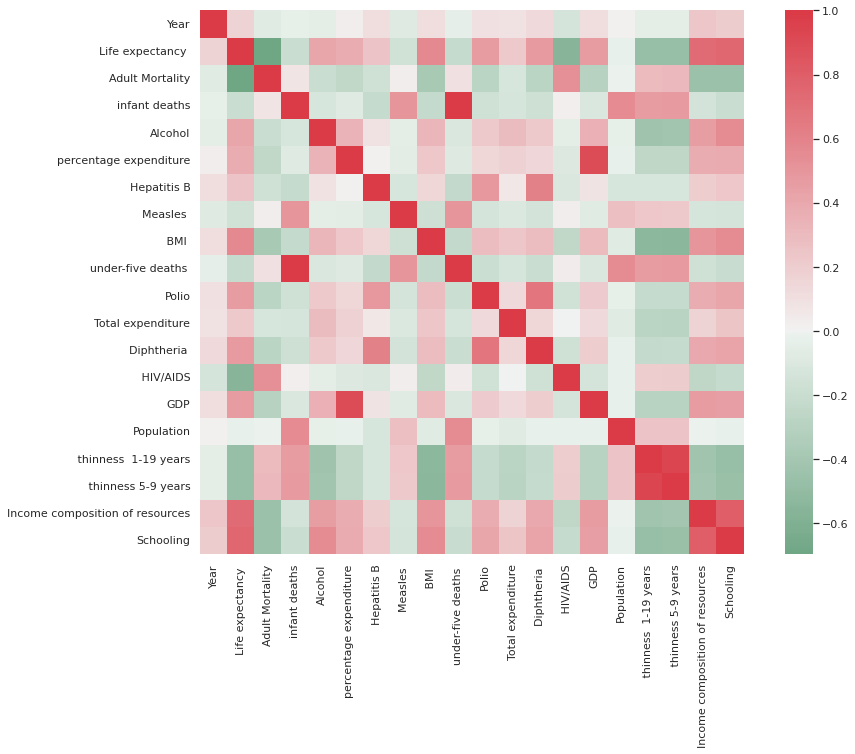

In [9]:
# plot correlation heatmap
plt.figure(figsize=(15, 10))
cmap = sns.diverging_palette(h_neg=500, h_pos=10, as_cmap=True)
sns.heatmap(life_expectancy_data.corr(), cmap=cmap, center=0, annot=False, square=True)

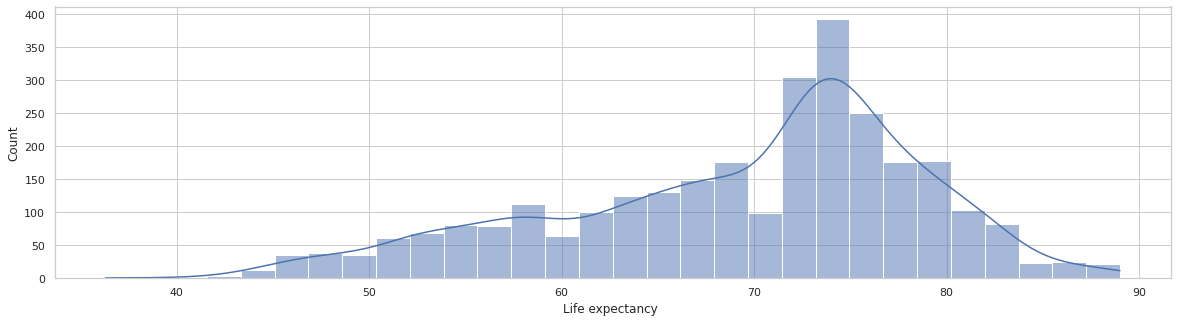

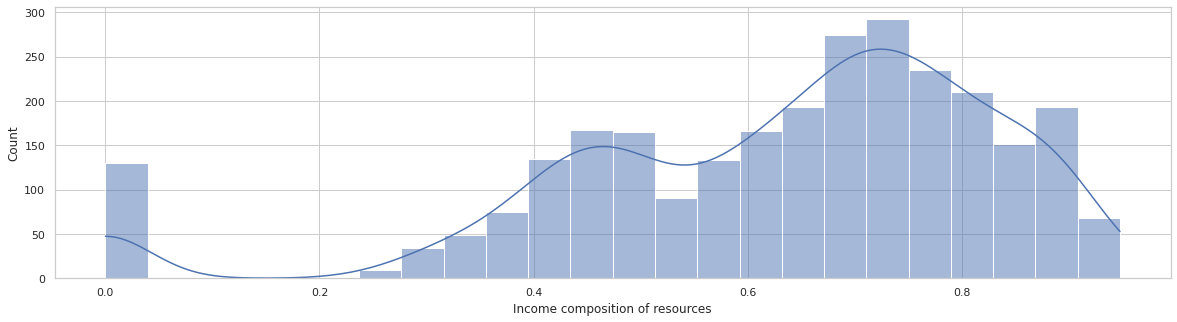

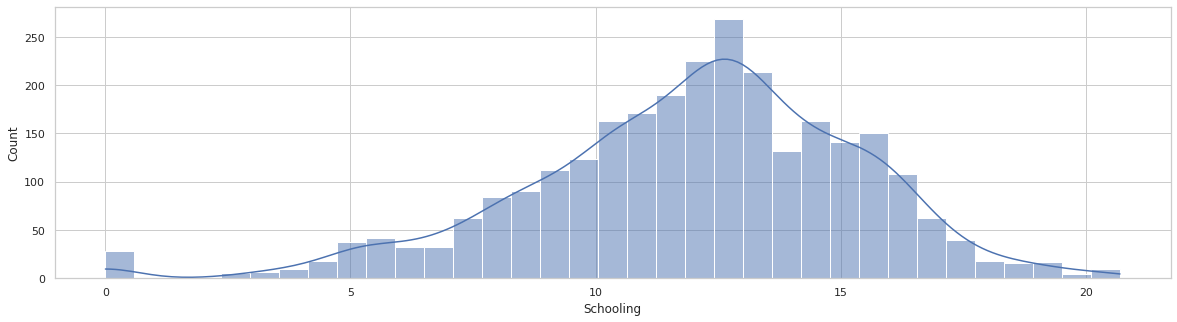

In [10]:
# plot histograms for Life expectancy, Income, and Schooling
l = [life_expectancy_data['Life expectancy '].dropna(), life_expectancy_data['Income composition of resources'].dropna(),
     life_expectancy_data['Schooling'].dropna()]
for i in l:
    plt.figure(figsize=(20,5))
    sns.histplot(i, kde=True)

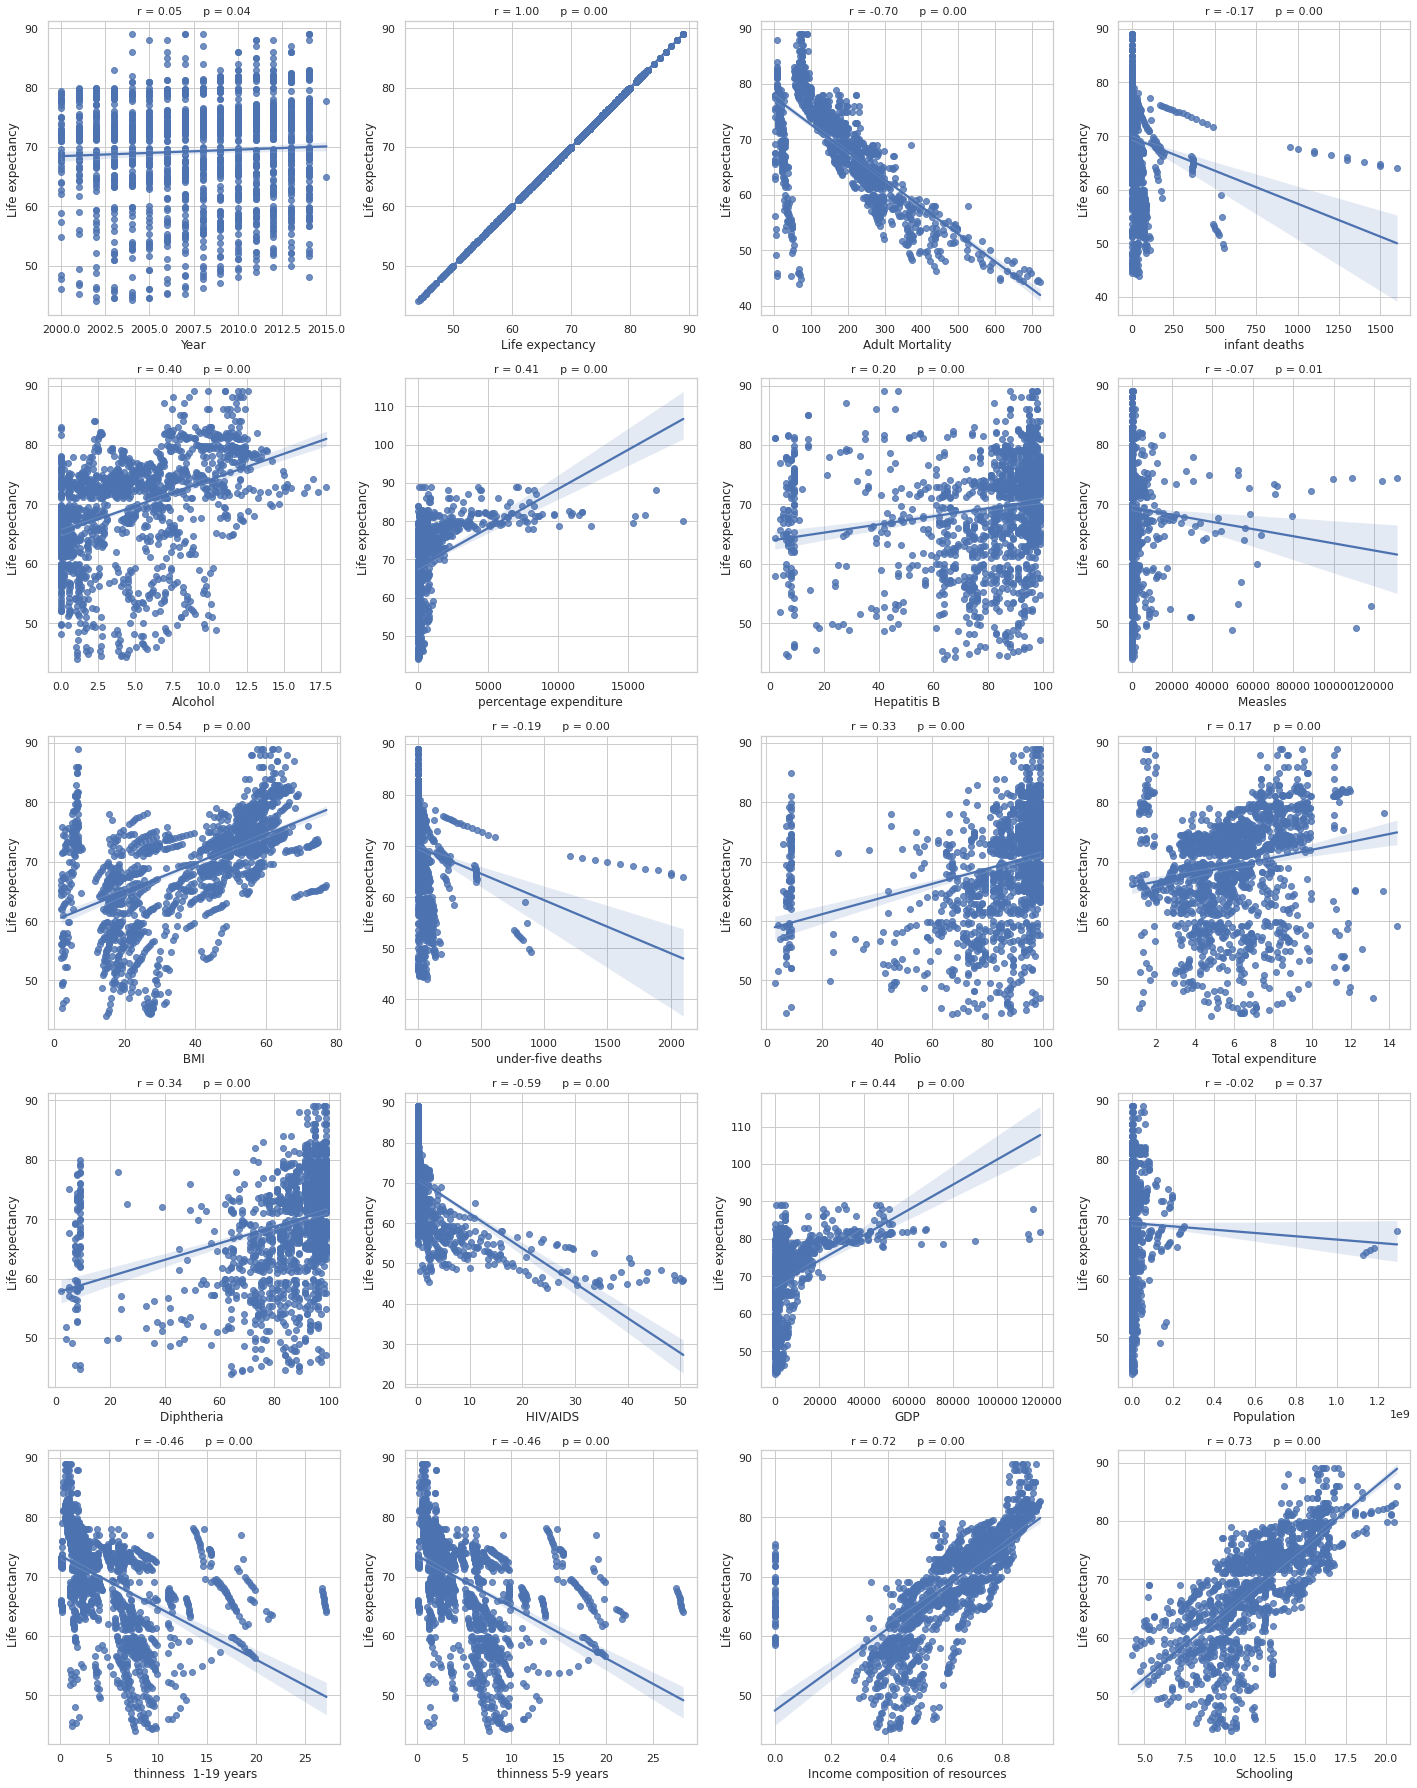

In [11]:
# plot linear regression models
nr_rows = 5
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*5, nr_rows*5))
numerical_features = life_expectancy_data.dtypes[life_expectancy_data.dtypes != 'object'].index
list_num_feats = list(numerical_features)
life_expectancy_data.dropna(inplace=True)

for r in range(nr_rows):
    for c in range(nr_cols):
        i = r*nr_cols + c
        if i < len(list_num_feats):
            sns.regplot(x=life_expectancy_data[list_num_feats[i]], 
                        y=life_expectancy_data['Life expectancy '], ax=axs[r][c])
            stp = stats.pearsonr(life_expectancy_data[list_num_feats[i]], life_expectancy_data['Life expectancy '])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)

plt.tight_layout()
plt.show()

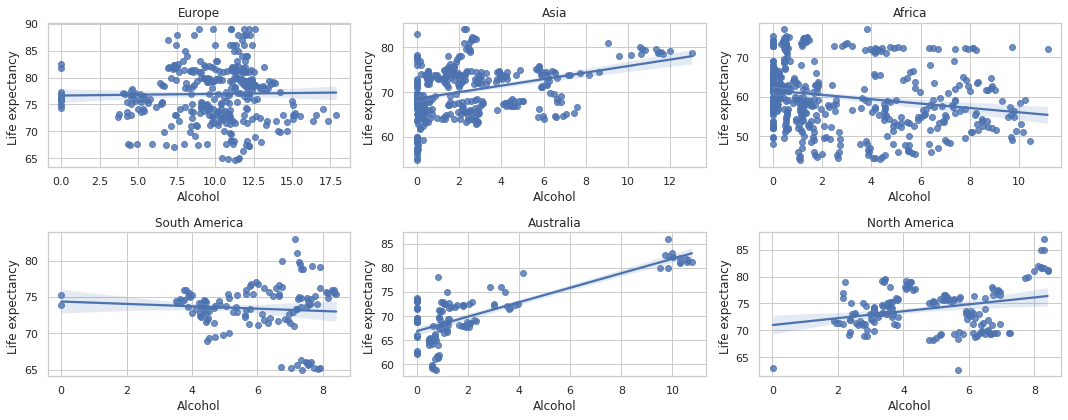

In [12]:
# plot Alcohol consumption over Life expectancy for different continents
fig, axs = plt.subplots(2, 3, figsize=(15,6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=0.5)

for conts, ax in zip(set(life_expectancy_data['Continent']), axs.flat):
    Conts = life_expectancy_data[life_expectancy_data["Continent"] == conts]
    sns.regplot(x=Conts['Alcohol'], y=Conts['Life expectancy '], ax=ax).set_title(conts)
    
plt.tight_layout()
plt.show()

In [13]:
# Life expectancy estimation regression model
target = life_expectancy_data['Life expectancy ']
features = life_expectancy_data[life_expectancy_data.columns.difference(['Life expectancy '])]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)

In [14]:
# Random search cross-validation RF
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
from pprint import pprint

# look at parameters used by the current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [15]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=4, stop=200, num=10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# method of selecting samples for training each tree
bootstrap = [True, False]

# create the random grid
random_grid = {'n_estimators': n_estimators, 
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [4, 25, 47, 69, 91, 112, 134, 156, 178, 200]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 7 fold cross validation,
# search across 200 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               verbose = 2, 
                               random_state = 42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

In [17]:
rf_random.best_params_

{'n_estimators': 134,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [18]:
# Evaluate base and tuned models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestRegressor()
base_model.fit(X_train, Y_train)
base_accuracy = evaluate(base_model, X_test, Y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, Y_test)

print('Improvement of {:0.2f}%.'.format(100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.1308 degrees
Accuracy = 98.28%.
Model Performance
Average Error: 1.1098 degrees
Accuracy = 98.31%.
Improvement of 0.03%.


In [19]:
# Grid search with cross validation RF
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True, False], 
              'max_depth': [10, 20, 50, None], 
              'max_features': [2, 3, 4, 'auto', 'sqrt'], 
              'min_samples_leaf': [1, 3, 5], 
              'min_samples_split': [1, 2, 4, 8], 
              'n_estimators': [10, 30, 100, 120, 150]}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train, Y_train)

In [21]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [22]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, Y_test)
print('Improvement of {:0.2f}%.'.format(100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.1268 degrees
Accuracy = 98.28%.
Improvement of 0.00%.


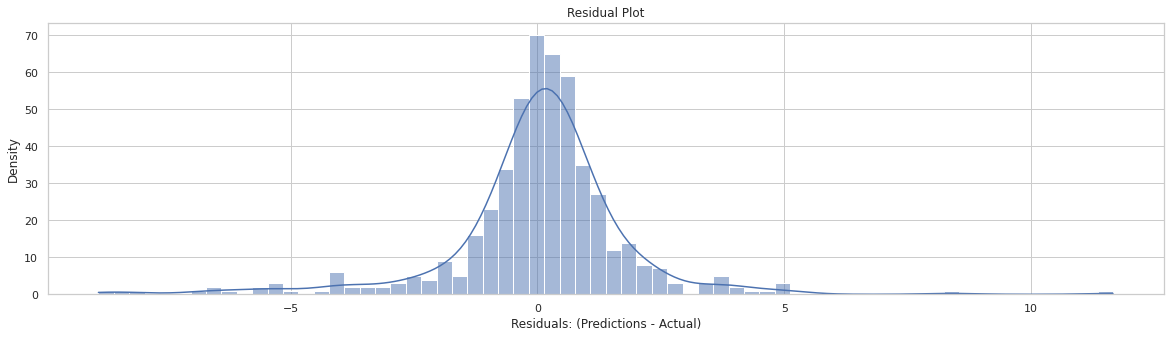

In [23]:
# plot residuals
model_predictions = best_grid.predict(X_test)
residuals = model_predictions - Y_test

plt.figure(figsize=(20,5))
sns.histplot(residuals, kde=True)
plt.title('Residual Plot')
plt.xlabel('Residuals: (Predictions - Actual)')
plt.ylabel('Density')
plt.show()

In [24]:
# check the R squared score 
from sklearn.metrics import r2_score
print("R-squared Score obtained for predicting Life expectancy is {0}".format(r2_score(Y_test, model_predictions)))

R-squared Score obtained for predicting Life expectancy is 0.9569326398428466
